# Examining Estimates for Scraping Github

This was an experiment in taking a sample of a few Github project home pages. It became an example of showing how bad we can be at estimating how long something will take up front based on limited progress. Using a simple method of estimation:

* Calculate the unit time: Divide the total time so far spent by the number of items of work
* Multiply the unit time by the total work volume minus the items completed

This is a method that is used in the real world, and it approximates how the human mind works when it performs software and data science estimation. Lets see what the consequences are of this algorithm!

In [20]:
import sys, os, re
import json
import pandas as pd
import numpy as np

with open("data/experiment.jsonl") as f:
  records = [json.loads(x) for x in f]
  index = [x[0] for x in records]

df = pd.DataFrame.from_records(
  records, 
  index=index, 
  columns=[
    'id', 
    'total', 
    'so_far', 
    'to_go', 
    'estimate_delta'
  ]
)

df[0:6]

,id,total,so_far,to_go,estimate_delta
0,0,4071996,899.405029,3.662374e+09,3.662374e+09
1,1,4071996,999.937988,2.035871e+09,1.626502e+09
2,2,4071996,1101.675781,1.495339e+09,5.405322e+08
3,3,4071996,1204.192139,1.225865e+09,2.694736e+08
4,4,4071996,1308.211914,1.065406e+09,1.604598e+08
5,5,4071996,1409.843994,9.568120e+08,1.085937e+08


## Estimation Up Front

When we estimate up front based on limited information, we make bad estimates that rapidly improve with the additional information that comes from progress on the project. Once things are up and running, even a few percent in, our estimates become much more accurate and valuable.

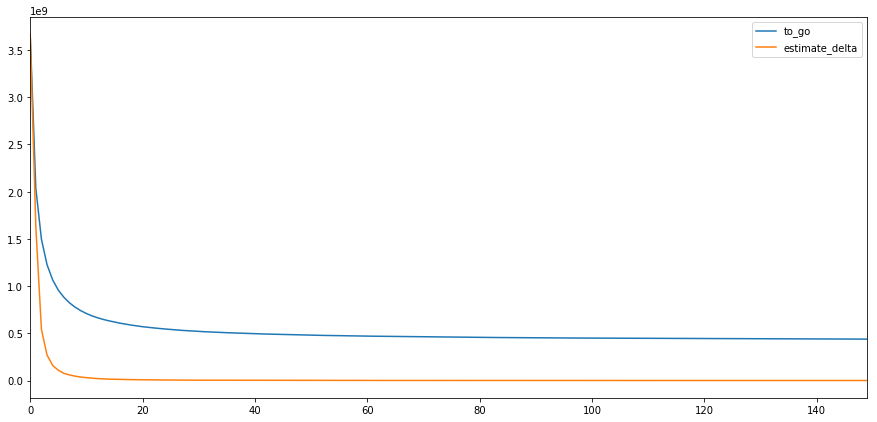

In [18]:
%matplotlib inline

# The data rapidly flattens, so zoom in on the first 200 records
plot_data = df[['to_go','estimate_delta']][0:150]

plot_data.plot(
  figsize=(15,7)
)